In [1]:
# 18 Apr 2020
# some scripts to plot misc quantities

from netCDF4 import Dataset
import numpy as np
from pyCDFTOOLS.generic_plotting import *
from pisces_plotting import *

from pyCDFTOOLS.draw_clock import *

working in kt 0 / 72...
working in kt 1 / 72...
working in kt 2 / 72...
working in kt 3 / 72...
working in kt 4 / 72...
working in kt 5 / 72...
working in kt 6 / 72...
working in kt 7 / 72...
working in kt 8 / 72...
working in kt 9 / 72...
working in kt 10 / 72...
working in kt 11 / 72...
working in kt 12 / 72...
working in kt 13 / 72...
working in kt 14 / 72...
working in kt 15 / 72...
working in kt 16 / 72...
working in kt 17 / 72...
working in kt 18 / 72...
working in kt 19 / 72...
working in kt 20 / 72...
working in kt 21 / 72...
working in kt 22 / 72...
working in kt 23 / 72...
working in kt 24 / 72...
working in kt 25 / 72...
working in kt 26 / 72...
working in kt 27 / 72...
working in kt 28 / 72...
working in kt 29 / 72...
working in kt 30 / 72...
working in kt 31 / 72...
working in kt 32 / 72...
working in kt 33 / 72...
working in kt 34 / 72...
working in kt 35 / 72...
working in kt 36 / 72...
working in kt 37 / 72...
working in kt 38 / 72...
working in kt 39 / 72...
working in

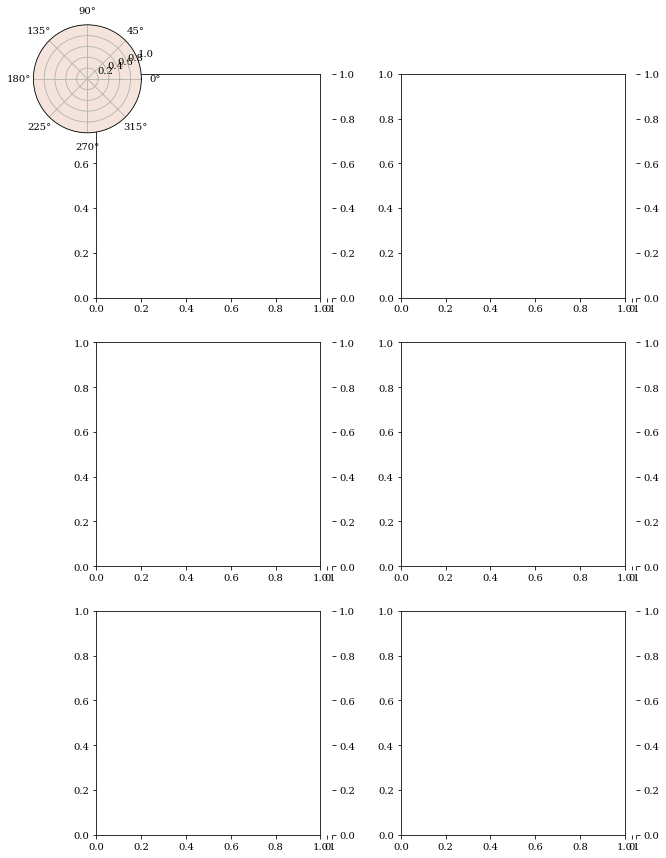

In [5]:
data_dir = "/home/jclmak/data/NEMO_data/GYRE09/with_BGC/"
fileT = "GYRE_5d_00200101_00201230_bgc_snap_T.nc"

# load the time vector
data = Dataset(data_dir + "/" + fileT)
time_vec = data.variables["time_centered"][:]
data.close()

yyyymmdd = convert_nemo_times(time_vec, uniform_months = True)

plot_opts = [{"levels" : 31, 
              "vmin" : 0.05, "vmax" : 0.40
             },
             {"levels" : 31, 
              "vmin" : 0.05, "vmax" : 0.40
             },
             {"levels" : 31, 
              "vmin" : 0.25, "vmax" : 2.0
             },
             {"levels" : 31, 
              "vmin" : 0.5, "vmax" : 3.0
             },
             {"levels" : 31, 
              "vmin" : 0.01, "vmax" : 0.05
             },
             {"levels" : 31, 
              "vmin" : 0.05, "vmax" : 1.5
             },
            ]

var_list = ["DET", "ZOO", "PHY", "NO3", "NH4", "DOM"]

fig = plt.figure(figsize = (10, 14))
axes_grid = fig.subplots(3, 2)
axes, axes_cb = [], []
for i in range(3):
    for j in range(2):
        axes.append(axes_grid[i][j])
        divider = make_axes_locatable(axes_grid[i][j])
        ax_cb = divider.append_axes("right", size = "2%", pad = 0.1, axes_class=plt.Axes)
        axes_cb.append(ax_cb)
        
ax_clock = plt.axes([0.05, 0.80, .15, .15], polar = True)

for kt in range(72):

    print("working in kt %i / 72..." % kt)

    axes, lines, axes_cb = plot_bgc_all_latlon(data_dir, fileT, kt = kt, var_list = var_list, 
                                               axes = axes, axes_cb = axes_cb,
                                               plot_opts = plot_opts)

    # post-mortem touch up
    axes[0].set_title(r"detritus ($z = 0$)")
    axes_cb[0].set_ylabel(r"$\mu\mathrm{molN}\ \mathrm{m}^{-3}$")

    axes[1].set_title(r"zooplankton conc. ($z = 0$)")
    axes_cb[1].set_ylabel(r"$\mu\mathrm{mol}\ \mathrm{m}^{-3}$")

    axes[2].set_title(r"phytoplankton conc. ($z = 0$)")
    axes_cb[2].set_ylabel(r"$\mu\mathrm{mol}\ \mathrm{m}^{-3}$")

    axes[3].set_title(r"nitrate conc. ($z = 0$)")
    axes_cb[3].set_ylabel(r"$\mu\mathrm{mol}\ \mathrm{m}^{-3}$")

    axes[4].set_title(r"ammonium conc. ($z = 0$)")
    axes_cb[4].set_ylabel(r"$\mu\mathrm{mol}\ \mathrm{m}^{-3}$")

    axes[5].set_title(r"dissolved organic matter ($z = 0$)")
    axes_cb[5].set_ylabel(r"$\mu\mathrm{molN}\ \mathrm{m}^{-3}$")
    
    draw_clock(yyyymmdd[kt], ax = ax_clock, fontsize = 10, 
               clock_color = cmocean.cm.curl(135), progress_color = cmocean.cm.curl_r)
    
    fig.savefig(f"dummy{kt}.png", dpi = 75, bbox_inches = "tight")

    for ax in axes:
        ax.clear()
    for ax_cb in axes_cb:
        ax_cb.clear()
    ax_clock.clear()
    
#     plt.close(fig)

Text(0.5, 1.0, '${}^\\circ\\mathrm{C}$')

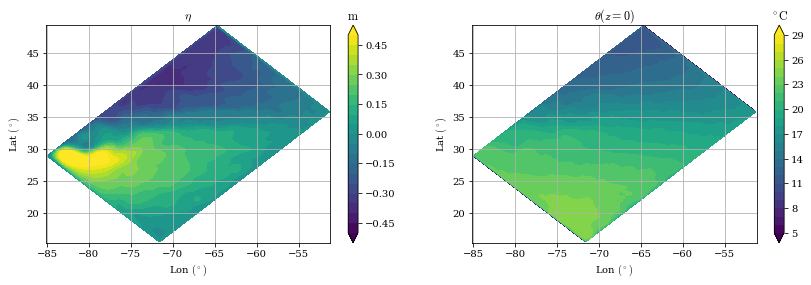

In [16]:
# plot some physical quantities
fileT = "GYRE_1y_00200101_00201230_grid_T.nc"

data    = Dataset(data_dir + "/" + fileT)
xT      = data.variables["nav_lon"][:, :]
yT      = data.variables["nav_lat"][:, :]
z       =-data.variables["deptht"][:]
toce    = data.variables["votemper"][-1, :, :, :]
ssh     = data.variables["sossheig"][-1, :, :]
data.close()

# put in the boundary conditions as NaNs to appease the contour algorithms
ssh[-1, :], ssh[0, :] = np.nan, np.nan
toce[:, -1, :], toce[:, 0, :] = np.nan, np.nan

fig = plt.figure(figsize = (14, 4))
ax = plt.subplot2grid((1, 2), (0, 0), colspan = 1)
ax_labels = {"title" : r"$\eta$", 
             "xlabel" : "Lon $({}^\circ)$", "ylabel" : "Lat $({}^\circ)$",}
plot_opts = {"levels" : np.arange(-0.5, 0.55, 0.05), "extend" : "both"}
ax, cs = plot_2d_contourf(xT, yT, ssh, ax = ax, ax_labels = ax_labels, **plot_opts)
cax = plt.colorbar(cs)
cax.ax.set_title(r"$\mathrm{m}$")

ax = plt.subplot2grid((1, 2), (0, 1), colspan = 1)
ax_labels = {"title" : r"$\theta(z = 0)$", 
             "xlabel" : "Lon $({}^\circ)$", "ylabel" : "Lat $({}^\circ)$",}
plot_opts = {"levels" : np.arange(5, 30, 1), "extend" : "both"}
ax, cs = plot_2d_contourf(xT, yT, toce[0, :, :], ax = ax, ax_labels = ax_labels, **plot_opts)
cax = plt.colorbar(cs)
cax.ax.set_title(r"${}^\circ\mathrm{C}$")

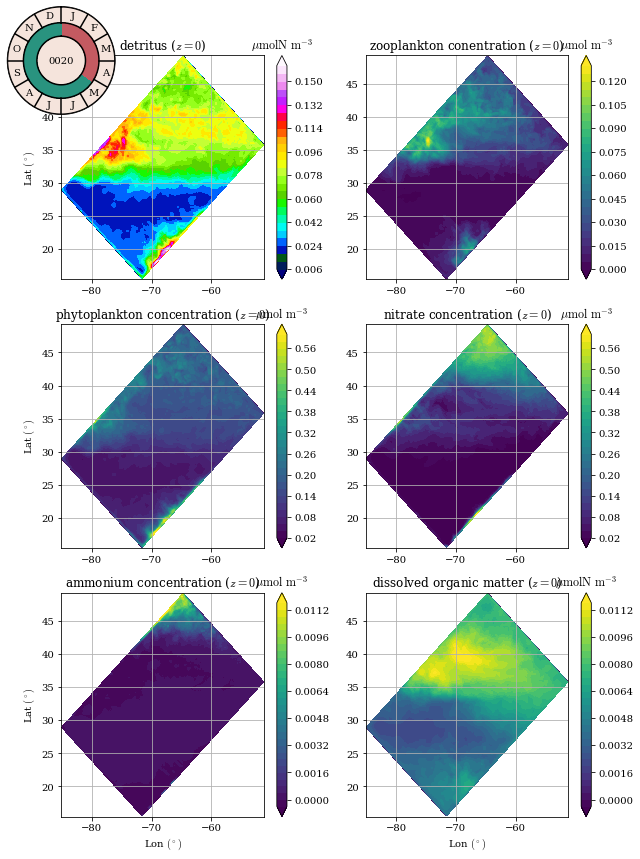

In [21]:
# plot some biological quantities
fileT = "GYRE_1y_00200101_00201230_ptrc_T.nc"

data    = Dataset(data_dir + "/" + fileT)
xT      = data.variables["nav_lon"][:, :]
yT      = data.variables["nav_lat"][:, :]
z       =-data.variables["deptht"][:]
det     = data.variables["DET"][-1, :, :, :]
zoo     = data.variables["ZOO"][-1, :, :, :]
phy     = data.variables["PHY"][-1, :, :, :]
no3     = data.variables["NO3"][-1, :, :, :]
nh4     = data.variables["NH4"][-1, :, :, :]
dom     = data.variables["DOM"][-1, :, :, :]
data.close()

# put in the boundary conditions as NaNs  to appease the contour algorithms
det[:, -1, :], det[:, 0, :] = np.nan, np.nan
zoo[:, -1, :], zoo[:, 0, :] = np.nan, np.nan
phy[:, -1, :], phy[:, 0, :] = np.nan, np.nan
no3[:, -1, :], no3[:, 0, :] = np.nan, np.nan
nh4[:, -1, :], nh4[:, 0, :] = np.nan, np.nan
dom[:, -1, :], dom[:, 0, :] = np.nan, np.nan

fig = plt.figure(figsize = (10, 14))

ax = plt.subplot2grid((3, 2), (0, 0), colspan = 1)
cs = ax.contourf(xT, yT, det[0, :, :], 31, extend = "both", cmap = "gist_ncar")
ax.set_title(r"detritus ($z = 0$)")
ax.set_ylabel("Lat $({}^\circ)$")
ax.grid()
cax = plt.colorbar(cs)
cax.ax.set_title(r"$\mu\mathrm{molN}\ \mathrm{m}^{-3}$")

ax = plt.subplot2grid((3, 2), (0, 1), colspan = 1)
cs = ax.contourf(xT, yT, zoo[0, :, :], 31, extend = "both")
ax.set_title(r"zooplankton conentration ($z = 0$)")
ax.grid()
cax = plt.colorbar(cs)
cax.ax.set_title(r"$\mu\mathrm{mol}\ \mathrm{m}^{-3}$")

ax = plt.subplot2grid((3, 2), (1, 0), colspan = 1)
cs = ax.contourf(xT, yT, phy[0, :, :], 31, extend = "both")
ax.set_title(r"phytoplankton concentration ($z = 0$)")
ax.set_ylabel("Lat $({}^\circ)$")
ax.grid()
cax = plt.colorbar(cs)
cax.ax.set_title(r"$\mu\mathrm{mol}\ \mathrm{m}^{-3}$")

ax = plt.subplot2grid((3, 2), (1, 1), colspan = 1)
mesh = ax.contourf(xT, yT, no3[0, :, :], 31, extend = "both")
ax.set_title(r"nitrate concentration ($z = 0$)")
ax.grid()
cax = plt.colorbar(cs)
cax.ax.set_title(r"$\mu\mathrm{mol}\ \mathrm{m}^{-3}$")

ax = plt.subplot2grid((3, 2), (2, 0), colspan = 1)
cs = ax.contourf(xT, yT, nh4[0, :, :], 31, extend = "both")
ax.set_title(r"ammonium concentration ($z = 0$)")
ax.set_xlabel("Lon $({}^\circ)$")
ax.set_ylabel("Lat $({}^\circ)$")
ax.grid()
cax = plt.colorbar(cs)
cax.ax.set_title(r"$\mu\mathrm{mol}\ \mathrm{m}^{-3}$")

ax = plt.subplot2grid((3, 2), (2, 1), colspan = 1)
mesh = ax.contourf(xT, yT, dom[0, :, :], 31, extend = "both")
ax.set_title(r"dissolved organic matter ($z = 0$)")
ax.set_xlabel("Lon $({}^\circ)$")
ax.grid()
cax = plt.colorbar(cs)
cax.ax.set_title(r"$\mu\mathrm{molN}\ \mathrm{m}^{-3}$")

ax_clock = plt.axes([0.05, 0.80, .15, .15], polar = True)
draw_clock(yyyymmdd[kt], ax = ax_clock, fontsize = 10, 
               clock_color = cmocean.cm.curl(135), progress_color = cmocean.cm.curl_r)